In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation
sns.set()

In [3]:
def create_data(mean1, sigma1, mean2, sigma2, size, rate):
    sample1_1 = np.random.multivariate_normal(mean1, sigma1, int((size * rate) / 2))
    sample1_2 = np.random.multivariate_normal(-mean1, sigma1, int((size * rate) / 2))
    sample1 = np.vstack((sample1_1, sample1_2))
    class1 = np.ones(sample1.shape[0])

    sample2_1 = np.random.multivariate_normal(mean2, sigma2, int(size * (1 - rate) / 2))
    sample2_2 = np.random.multivariate_normal(-mean2, sigma2, int(size * (1 - rate) / 2))
    sample2 = np.vstack((sample2_1, sample2_2))
    class2 = np.zeros(sample2.shape[0])

    X = np.vstack((sample1, sample2))
    y = np.hstack((class1, class2))
    return sample1, sample2, X, y

In [4]:
def create_model(input_dim, hidden_dim, hidden_layer):
    model = Sequential()
    model.add(Dense(hidden_dim, input_dim=input_dim, activation='relu'))
    model.add(Activation('relu'))

    for i in range(hidden_layer):
        model.add(Dense(hidden_dim))
        model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
mean1 = np.array([5, 5])
sigma1 = np.array([[5, 0], [0, 5]])
mean2 = np.array([5, -5])
sigma2 = np.array([[10, 0], [0, 10]])
c1_rate = 0.5
class1, class2, X, y = create_data(mean1, sigma1, mean2, sigma2, 5000, c1_rate)

Epoch 1/20


  32/5000 [..............................] - ETA: 4:13 - loss: 0.9719 - acc: 0.5312

 768/5000 [===>..........................] - ETA: 9s - loss: 0.9861 - acc: 0.4701  

1664/5000 [========>.....................] - ETA: 3s - loss: 0.8366 - acc: 0.5361

2560/5000 [==============>...............] - ETA: 1s - loss: 0.7474 - acc: 0.5977

3424/5000 [===================>..........] - ETA: 0s - loss: 0.6909 - acc: 0.6265

4320/5000 [========================>.....] - ETA: 0s - loss: 0.6457 - acc: 0.6449

5000/5000 [==============================] - 2s 385us/step - loss: 0.6158 - acc: 0.6574


Epoch 2/20
  32/5000 [..............................] - ETA: 0s - loss: 0.4264 - acc: 0.7188

 512/5000 [==>...........................] - ETA: 0s - loss: 0.4181 - acc: 0.7305

 896/5000 [====>.........................] - ETA: 0s - loss: 0.4152 - acc: 0.7199

1696/5000 [=========>....................] - ETA: 0s - loss: 0.4093 - acc: 0.7276

2592/5000 [==============>...............] - ETA: 0s - loss: 0.3980 - acc: 0.7546

3520/5000 [====================>.........] - ETA: 0s - loss: 0.3838 - acc: 0.7830

4384/5000 [=========================>....] - ETA: 0s - loss: 0.3712 - acc: 0.7984

5000/5000 [==============================] - 0s 70us/step - loss: 0.3661 - acc: 0.8080


Epoch 3/20
  32/5000 [..............................] - ETA: 0s - loss: 0.3331 - acc: 0.8750

 608/5000 [==>...........................] - ETA: 0s - loss: 0.3089 - acc: 0.9062

 960/5000 [====>.........................] - ETA: 0s - loss: 0.3128 - acc: 0.8990

1728/5000 [=========>....................] - ETA: 0s - loss: 0.3045 - acc: 0.9028

2592/5000 [==============>...............] - ETA: 0s - loss: 0.2987 - acc: 0.9070

3136/5000 [=================>............] - ETA: 0s - loss: 0.2965 - acc: 0.9072

3552/5000 [====================>.........] - ETA: 0s - loss: 0.2945 - acc: 0.9079

4160/5000 [=======================>......] - ETA: 0s - loss: 0.2914 - acc: 0.9075

5000/5000 [==============================] - 0s 81us/step - loss: 0.2873 - acc: 0.9076


Epoch 4/20
  32/5000 [..............................] - ETA: 0s - loss: 0.3286 - acc: 0.8125

 576/5000 [==>...........................] - ETA: 0s - loss: 0.2352 - acc: 0.9323

1024/5000 [=====>........................] - ETA: 0s - loss: 0.2507 - acc: 0.9258

1856/5000 [==========>...................] - ETA: 0s - loss: 0.2601 - acc: 0.9149

2752/5000 [===============>..............] - ETA: 0s - loss: 0.2515 - acc: 0.9208

3616/5000 [====================>.........] - ETA: 0s - loss: 0.2452 - acc: 0.9251

4512/5000 [==========================>...] - ETA: 0s - loss: 0.2355 - acc: 0.9291

5000/5000 [==============================] - 0s 69us/step - loss: 0.2355 - acc: 0.9280


Epoch 5/20
  32/5000 [..............................] - ETA: 0s - loss: 0.2431 - acc: 0.8750

 640/5000 [==>...........................] - ETA: 0s - loss: 0.2031 - acc: 0.9391

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1951 - acc: 0.9422

1824/5000 [=========>....................] - ETA: 0s - loss: 0.2004 - acc: 0.9370

2720/5000 [===============>..............] - ETA: 0s - loss: 0.2011 - acc: 0.9349

3584/5000 [====================>.........] - ETA: 0s - loss: 0.1973 - acc: 0.9361

4416/5000 [=========================>....] - ETA: 0s - loss: 0.1943 - acc: 0.9355

5000/5000 [==============================] - 0s 69us/step - loss: 0.1963 - acc: 0.9340


Epoch 6/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1484 - acc: 0.9688

 672/5000 [===>..........................] - ETA: 0s - loss: 0.1980 - acc: 0.9315

1248/5000 [======>.......................] - ETA: 0s - loss: 0.1950 - acc: 0.9303

1760/5000 [=========>....................] - ETA: 0s - loss: 0.1932 - acc: 0.9295

2592/5000 [==============>...............] - ETA: 0s - loss: 0.1861 - acc: 0.9317

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1851 - acc: 0.9321

4448/5000 [=========================>....] - ETA: 0s - loss: 0.1768 - acc: 0.9350

5000/5000 [==============================] - 0s 68us/step - loss: 0.1737 - acc: 0.9366


Epoch 7/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1786 - acc: 0.8750

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1684 - acc: 0.9313

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1615 - acc: 0.9331

1888/5000 [==========>...................] - ETA: 0s - loss: 0.1628 - acc: 0.9359

2720/5000 [===============>..............] - ETA: 0s - loss: 0.1682 - acc: 0.9364

3584/5000 [====================>.........] - ETA: 0s - loss: 0.1685 - acc: 0.9361

4512/5000 [==========================>...] - ETA: 0s - loss: 0.1676 - acc: 0.9366

5000/5000 [==============================] - 0s 68us/step - loss: 0.1642 - acc: 0.9374


Epoch 8/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0822 - acc: 0.9688

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1755 - acc: 0.9336

1408/5000 [=======>......................] - ETA: 0s - loss: 0.1660 - acc: 0.9354

1920/5000 [==========>...................] - ETA: 0s - loss: 0.1599 - acc: 0.9396

2752/5000 [===============>..............] - ETA: 0s - loss: 0.1571 - acc: 0.9408

3680/5000 [=====================>........] - ETA: 0s - loss: 0.1615 - acc: 0.9372

4544/5000 [==========================>...] - ETA: 0s - loss: 0.1590 - acc: 0.9382

5000/5000 [==============================] - 0s 68us/step - loss: 0.1595 - acc: 0.9390


Epoch 9/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0797 - acc: 0.9688

 736/5000 [===>..........................] - ETA: 0s - loss: 0.1728 - acc: 0.9389

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1705 - acc: 0.9411

1920/5000 [==========>...................] - ETA: 0s - loss: 0.1560 - acc: 0.9437

2592/5000 [==============>...............] - ETA: 0s - loss: 0.1541 - acc: 0.9433

3424/5000 [===================>..........] - ETA: 0s - loss: 0.1492 - acc: 0.9451

4224/5000 [========================>.....] - ETA: 0s - loss: 0.1564 - acc: 0.9418

5000/5000 [==============================] - 0s 71us/step - loss: 0.1573 - acc: 0.9412


Epoch 10/20


  32/5000 [..............................] - ETA: 0s - loss: 0.2636 - acc: 0.9062

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1590 - acc: 0.9453

1344/5000 [=======>......................] - ETA: 0s - loss: 0.1532 - acc: 0.9442

1792/5000 [=========>....................] - ETA: 0s - loss: 0.1547 - acc: 0.9420

2432/5000 [=============>................] - ETA: 0s - loss: 0.1545 - acc: 0.9400

3232/5000 [==================>...........] - ETA: 0s - loss: 0.1522 - acc: 0.9415

4064/5000 [=======================>......] - ETA: 0s - loss: 0.1548 - acc: 0.9402

4896/5000 [============================>.] - ETA: 0s - loss: 0.1557 - acc: 0.9395

5000/5000 [==============================] - 0s 74us/step - loss: 0.1558 - acc: 0.9394


Epoch 11/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0901 - acc: 0.9375

 640/5000 [==>...........................] - ETA: 0s - loss: 0.1207 - acc: 0.9563

1216/5000 [======>.......................] - ETA: 0s - loss: 0.1558 - acc: 0.9408

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1496 - acc: 0.9405

2528/5000 [==============>...............] - ETA: 0s - loss: 0.1592 - acc: 0.9351

3392/5000 [===================>..........] - ETA: 0s - loss: 0.1590 - acc: 0.9381

4160/5000 [=======================>......] - ETA: 0s - loss: 0.1577 - acc: 0.9394

4992/5000 [============================>.] - ETA: 0s - loss: 0.1547 - acc: 0.9415

5000/5000 [==============================] - 0s 72us/step - loss: 0.1545 - acc: 0.9416


Epoch 12/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1422 - acc: 0.9688

 640/5000 [==>...........................] - ETA: 0s - loss: 0.1181 - acc: 0.9547

1248/5000 [======>.......................] - ETA: 0s - loss: 0.1401 - acc: 0.9471

1728/5000 [=========>....................] - ETA: 0s - loss: 0.1404 - acc: 0.9479

2496/5000 [=============>................] - ETA: 0s - loss: 0.1467 - acc: 0.9451

3392/5000 [===================>..........] - ETA: 0s - loss: 0.1505 - acc: 0.9440

4288/5000 [========================>.....] - ETA: 0s - loss: 0.1510 - acc: 0.9440

5000/5000 [==============================] - 0s 72us/step - loss: 0.1535 - acc: 0.9422


Epoch 13/20
  32/5000 [..............................] - ETA: 0s - loss: 0.2117 - acc: 0.9375

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1367 - acc: 0.9583

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1473 - acc: 0.9469

1888/5000 [==========>...................] - ETA: 0s - loss: 0.1429 - acc: 0.9481

2784/5000 [===============>..............] - ETA: 0s - loss: 0.1543 - acc: 0.9440

3648/5000 [====================>.........] - ETA: 0s - loss: 0.1488 - acc: 0.9452

4480/5000 [=========================>....] - ETA: 0s - loss: 0.1537 - acc: 0.9429

5000/5000 [==============================] - 0s 69us/step - loss: 0.1531 - acc: 0.9430


Epoch 14/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0265 - acc: 1.0000

 736/5000 [===>..........................] - ETA: 0s - loss: 0.1491 - acc: 0.9348

1344/5000 [=======>......................] - ETA: 0s - loss: 0.1470 - acc: 0.9420

1856/5000 [==========>...................] - ETA: 0s - loss: 0.1461 - acc: 0.9434

2688/5000 [===============>..............] - ETA: 0s - loss: 0.1564 - acc: 0.9416

3552/5000 [====================>.........] - ETA: 0s - loss: 0.1503 - acc: 0.9445

4320/5000 [========================>.....] - ETA: 0s - loss: 0.1477 - acc: 0.9454

5000/5000 [==============================] - 0s 70us/step - loss: 0.1524 - acc: 0.9426


Epoch 15/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0682 - acc: 1.0000

 736/5000 [===>..........................] - ETA: 0s - loss: 0.1591 - acc: 0.9375

1280/5000 [======>.......................] - ETA: 0s - loss: 0.1488 - acc: 0.9430

1792/5000 [=========>....................] - ETA: 0s - loss: 0.1454 - acc: 0.9459

2656/5000 [==============>...............] - ETA: 0s - loss: 0.1435 - acc: 0.9480

3584/5000 [====================>.........] - ETA: 0s - loss: 0.1448 - acc: 0.9470

4416/5000 [=========================>....] - ETA: 0s - loss: 0.1510 - acc: 0.9445

5000/5000 [==============================] - 0s 69us/step - loss: 0.1523 - acc: 0.9430


Epoch 16/20
  32/5000 [..............................] - ETA: 0s - loss: 0.2307 - acc: 0.9375

 704/5000 [===>..........................] - ETA: 0s - loss: 0.1711 - acc: 0.9375

1280/5000 [======>.......................] - ETA: 0s - loss: 0.1562 - acc: 0.9414

1728/5000 [=========>....................] - ETA: 0s - loss: 0.1590 - acc: 0.9421

2496/5000 [=============>................] - ETA: 0s - loss: 0.1586 - acc: 0.9447

3328/5000 [==================>...........] - ETA: 0s - loss: 0.1559 - acc: 0.9435

4128/5000 [=======================>......] - ETA: 0s - loss: 0.1560 - acc: 0.9426

4928/5000 [============================>.] - ETA: 0s - loss: 0.1527 - acc: 0.9432

5000/5000 [==============================] - 0s 73us/step - loss: 0.1522 - acc: 0.9436


Epoch 17/20
  32/5000 [..............................] - ETA: 0s - loss: 0.4066 - acc: 0.8750

 640/5000 [==>...........................] - ETA: 0s - loss: 0.1683 - acc: 0.9328

1216/5000 [======>.......................] - ETA: 0s - loss: 0.1668 - acc: 0.9350

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1642 - acc: 0.9387

2432/5000 [=============>................] - ETA: 0s - loss: 0.1584 - acc: 0.9412

3264/5000 [==================>...........] - ETA: 0s - loss: 0.1581 - acc: 0.9409

4128/5000 [=======================>......] - ETA: 0s - loss: 0.1529 - acc: 0.9426

4992/5000 [============================>.] - ETA: 0s - loss: 0.1518 - acc: 0.9425

5000/5000 [==============================] - 0s 72us/step - loss: 0.1517 - acc: 0.9424


Epoch 18/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0448 - acc: 1.0000

 672/5000 [===>..........................] - ETA: 0s - loss: 0.1458 - acc: 0.9494

1216/5000 [======>.......................] - ETA: 0s - loss: 0.1514 - acc: 0.9457

1504/5000 [========>.....................] - ETA: 0s - loss: 0.1447 - acc: 0.9468

2080/5000 [===========>..................] - ETA: 0s - loss: 0.1538 - acc: 0.9428

2880/5000 [================>.............] - ETA: 0s - loss: 0.1482 - acc: 0.9472

3680/5000 [=====================>........] - ETA: 0s - loss: 0.1576 - acc: 0.9421

4512/5000 [==========================>...] - ETA: 0s - loss: 0.1513 - acc: 0.9455

5000/5000 [==============================] - 0s 80us/step - loss: 0.1521 - acc: 0.9446


Epoch 19/20
  32/5000 [..............................] - ETA: 0s - loss: 0.3048 - acc: 0.8125

 704/5000 [===>..........................] - ETA: 0s - loss: 0.1700 - acc: 0.9290

1248/5000 [======>.......................] - ETA: 0s - loss: 0.1643 - acc: 0.9359

1824/5000 [=========>....................] - ETA: 0s - loss: 0.1570 - acc: 0.9386

2656/5000 [==============>...............] - ETA: 0s - loss: 0.1523 - acc: 0.9424

3552/5000 [====================>.........] - ETA: 0s - loss: 0.1559 - acc: 0.9412

4416/5000 [=========================>....] - ETA: 0s - loss: 0.1525 - acc: 0.9429

5000/5000 [==============================] - 0s 69us/step - loss: 0.1513 - acc: 0.9438


Epoch 20/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1189 - acc: 0.9688

 704/5000 [===>..........................] - ETA: 0s - loss: 0.1439 - acc: 0.9517

1280/5000 [======>.......................] - ETA: 0s - loss: 0.1555 - acc: 0.9445

1888/5000 [==========>...................] - ETA: 0s - loss: 0.1608 - acc: 0.9423

2720/5000 [===============>..............] - ETA: 0s - loss: 0.1550 - acc: 0.9434

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1522 - acc: 0.9449

4320/5000 [========================>.....] - ETA: 0s - loss: 0.1513 - acc: 0.9458

5000/5000 [==============================] - 0s 70us/step - loss: 0.1515 - acc: 0.9456


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


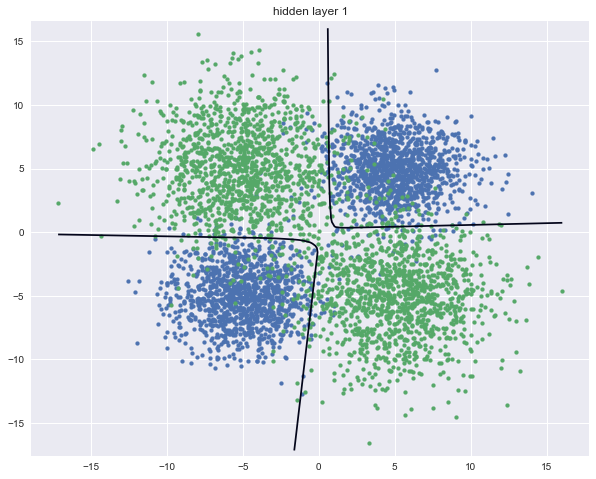

In [6]:
model1 = create_model(2, 10, 1)
model1.fit(X, y, epochs=20)

axis = np.linspace(X[:, 0].min(), X[:, 0].max(), (X[:, 0].max() - X[:, 0].min()) * 3)
x1_mesh, x2_mesh = np.meshgrid(axis, axis)
predict = model1.predict(np.vstack((x1_mesh.flatten(), x2_mesh.flatten())).T)
predict = predict.reshape(x1_mesh.shape)
plt.figure(figsize=(10, 8))
plt.scatter(class1[:, 0], class1[:, 1], s=15)
plt.scatter(class2[:, 0], class2[:, 1], s=15)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.title('hidden layer 1')
contour = plt.contour(x1_mesh, x2_mesh, predict, levels=[0.5])

Epoch 1/20


  32/5000 [..............................] - ETA: 8:03 - loss: 0.6933 - acc: 0.4062

 288/5000 [>.............................] - ETA: 51s - loss: 0.6930 - acc: 0.5035 

 544/5000 [==>...........................] - ETA: 26s - loss: 0.6929 - acc: 0.4982

 832/5000 [===>..........................] - ETA: 16s - loss: 0.6925 - acc: 0.5204

1120/5000 [=====>........................] - ETA: 11s - loss: 0.6918 - acc: 0.5786

1408/5000 [=======>......................] - ETA: 8s - loss: 0.6908 - acc: 0.6087 

1696/5000 [=========>....................] - ETA: 6s - loss: 0.6889 - acc: 0.6403

1984/5000 [==========>...................] - ETA: 5s - loss: 0.6851 - acc: 0.6774

2272/5000 [============>.................] - ETA: 4s - loss: 0.6798 - acc: 0.7033

2560/5000 [==============>...............] - ETA: 3s - loss: 0.6696 - acc: 0.7285

2848/5000 [================>.............] - ETA: 2s - loss: 0.6508 - acc: 0.7468

3168/5000 [==================>...........] - ETA: 2s - loss: 0.6196 - acc: 0.7652

3488/5000 [===================>..........] - ETA: 1s - loss: 0.5912 - acc: 0.7824

3808/5000 [=====================>........] - ETA: 1s - loss: 0.5626 - acc: 0.7965

4128/5000 [=======================>......] - ETA: 0s - loss: 0.5357 - acc: 0.8069

4448/5000 [=========================>....] - ETA: 0s - loss: 0.5116 - acc: 0.8161

4768/5000 [===========================>..] - ETA: 0s - loss: 0.4917 - acc: 0.8245

5000/5000 [==============================] - 4s 801us/step - loss: 0.4784 - acc: 0.8288


Epoch 2/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1577 - acc: 0.9375

 320/5000 [>.............................] - ETA: 0s - loss: 0.1558 - acc: 0.9563

 544/5000 [==>...........................] - ETA: 0s - loss: 0.1498 - acc: 0.9522

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1757 - acc: 0.9400

1120/5000 [=====>........................] - ETA: 0s - loss: 0.1711 - acc: 0.9437

1440/5000 [=======>......................] - ETA: 0s - loss: 0.1673 - acc: 0.9465

1760/5000 [=========>....................] - ETA: 0s - loss: 0.1710 - acc: 0.9420

2080/5000 [===========>..................] - ETA: 0s - loss: 0.1686 - acc: 0.9442

2400/5000 [=============>................] - ETA: 0s - loss: 0.1758 - acc: 0.9421

2720/5000 [===============>..............] - ETA: 0s - loss: 0.1772 - acc: 0.9401

3040/5000 [=================>............] - ETA: 0s - loss: 0.1740 - acc: 0.9418

3360/5000 [===================>..........] - ETA: 0s - loss: 0.1708 - acc: 0.9426

3680/5000 [=====================>........] - ETA: 0s - loss: 0.1719 - acc: 0.9418

4000/5000 [=======================>......] - ETA: 0s - loss: 0.1737 - acc: 0.9400

4320/5000 [========================>.....] - ETA: 0s - loss: 0.1730 - acc: 0.9403

4640/5000 [==========================>...] - ETA: 0s - loss: 0.1751 - acc: 0.9392

4960/5000 [============================>.] - ETA: 0s - loss: 0.1741 - acc: 0.9399

5000/5000 [==============================] - 1s 171us/step - loss: 0.1733 - acc: 0.9400


Epoch 3/20
  32/5000 [..............................] - ETA: 1s - loss: 0.0516 - acc: 0.9688

 288/5000 [>.............................] - ETA: 0s - loss: 0.1591 - acc: 0.9549

 512/5000 [==>...........................] - ETA: 1s - loss: 0.1845 - acc: 0.9336

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1835 - acc: 0.9310

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1879 - acc: 0.9318

1344/5000 [=======>......................] - ETA: 0s - loss: 0.1904 - acc: 0.9301

1632/5000 [========>.....................] - ETA: 0s - loss: 0.1771 - acc: 0.9344

1920/5000 [==========>...................] - ETA: 0s - loss: 0.1819 - acc: 0.9323

2240/5000 [============>.................] - ETA: 0s - loss: 0.1801 - acc: 0.9321

2560/5000 [==============>...............] - ETA: 0s - loss: 0.1834 - acc: 0.9305

2880/5000 [================>.............] - ETA: 0s - loss: 0.1843 - acc: 0.9302

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1859 - acc: 0.9297

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1794 - acc: 0.9332

3840/5000 [======================>.......] - ETA: 0s - loss: 0.1759 - acc: 0.9341

4160/5000 [=======================>......] - ETA: 0s - loss: 0.1756 - acc: 0.9349

4480/5000 [=========================>....] - ETA: 0s - loss: 0.1721 - acc: 0.9366

4800/5000 [===========================>..] - ETA: 0s - loss: 0.1702 - acc: 0.9373

5000/5000 [==============================] - 1s 178us/step - loss: 0.1690 - acc: 0.9376


Epoch 4/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0960 - acc: 0.9688

 320/5000 [>.............................] - ETA: 0s - loss: 0.1669 - acc: 0.9406

 544/5000 [==>...........................] - ETA: 0s - loss: 0.1716 - acc: 0.9393

 736/5000 [===>..........................] - ETA: 0s - loss: 0.1919 - acc: 0.9334

1024/5000 [=====>........................] - ETA: 0s - loss: 0.1859 - acc: 0.9375

1344/5000 [=======>......................] - ETA: 0s - loss: 0.1657 - acc: 0.9412

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1683 - acc: 0.9417

1984/5000 [==========>...................] - ETA: 0s - loss: 0.1677 - acc: 0.9400

2304/5000 [============>.................] - ETA: 0s - loss: 0.1625 - acc: 0.9401

2624/5000 [==============>...............] - ETA: 0s - loss: 0.1667 - acc: 0.9386

2944/5000 [================>.............] - ETA: 0s - loss: 0.1654 - acc: 0.9385

3264/5000 [==================>...........] - ETA: 0s - loss: 0.1645 - acc: 0.9400

3584/5000 [====================>.........] - ETA: 0s - loss: 0.1648 - acc: 0.9397

3904/5000 [======================>.......] - ETA: 0s - loss: 0.1654 - acc: 0.9401

4224/5000 [========================>.....] - ETA: 0s - loss: 0.1645 - acc: 0.9413

4544/5000 [==========================>...] - ETA: 0s - loss: 0.1639 - acc: 0.9415

4864/5000 [============================>.] - ETA: 0s - loss: 0.1627 - acc: 0.9422

5000/5000 [==============================] - 1s 173us/step - loss: 0.1626 - acc: 0.9424


Epoch 5/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0395 - acc: 1.0000

 320/5000 [>.............................] - ETA: 0s - loss: 0.1690 - acc: 0.9406

 608/5000 [==>...........................] - ETA: 0s - loss: 0.1601 - acc: 0.9441

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1739 - acc: 0.9375

1120/5000 [=====>........................] - ETA: 0s - loss: 0.1653 - acc: 0.9420

1440/5000 [=======>......................] - ETA: 0s - loss: 0.1621 - acc: 0.9424

1760/5000 [=========>....................] - ETA: 0s - loss: 0.1579 - acc: 0.9426

2080/5000 [===========>..................] - ETA: 0s - loss: 0.1671 - acc: 0.9380

2400/5000 [=============>................] - ETA: 0s - loss: 0.1679 - acc: 0.9375

2720/5000 [===============>..............] - ETA: 0s - loss: 0.1672 - acc: 0.9375

3040/5000 [=================>............] - ETA: 0s - loss: 0.1684 - acc: 0.9365

3360/5000 [===================>..........] - ETA: 0s - loss: 0.1651 - acc: 0.9381

3680/5000 [=====================>........] - ETA: 0s - loss: 0.1614 - acc: 0.9394

4000/5000 [=======================>......] - ETA: 0s - loss: 0.1584 - acc: 0.9410

4320/5000 [========================>.....] - ETA: 0s - loss: 0.1578 - acc: 0.9424

4640/5000 [==========================>...] - ETA: 0s - loss: 0.1578 - acc: 0.9427

4960/5000 [============================>.] - ETA: 0s - loss: 0.1606 - acc: 0.9411

5000/5000 [==============================] - 1s 173us/step - loss: 0.1605 - acc: 0.9414


Epoch 6/20
  32/5000 [..............................] - ETA: 1s - loss: 0.0543 - acc: 1.0000

 320/5000 [>.............................] - ETA: 0s - loss: 0.1371 - acc: 0.9625

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1611 - acc: 0.9462

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1487 - acc: 0.9500

1088/5000 [=====>........................] - ETA: 0s - loss: 0.1504 - acc: 0.9485

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1588 - acc: 0.9426

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1550 - acc: 0.9453

1984/5000 [==========>...................] - ETA: 0s - loss: 0.1680 - acc: 0.9410

2304/5000 [============>.................] - ETA: 0s - loss: 0.1707 - acc: 0.9392

2624/5000 [==============>...............] - ETA: 0s - loss: 0.1673 - acc: 0.9409

2944/5000 [================>.............] - ETA: 0s - loss: 0.1682 - acc: 0.9406

3232/5000 [==================>...........] - ETA: 0s - loss: 0.1682 - acc: 0.9403

3552/5000 [====================>.........] - ETA: 0s - loss: 0.1646 - acc: 0.9412

3872/5000 [======================>.......] - ETA: 0s - loss: 0.1600 - acc: 0.9421

4192/5000 [========================>.....] - ETA: 0s - loss: 0.1581 - acc: 0.9427

4512/5000 [==========================>...] - ETA: 0s - loss: 0.1591 - acc: 0.9422

4832/5000 [===========================>..] - ETA: 0s - loss: 0.1618 - acc: 0.9414

5000/5000 [==============================] - 1s 178us/step - loss: 0.1605 - acc: 0.9420


Epoch 7/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1034 - acc: 0.9688

 320/5000 [>.............................] - ETA: 0s - loss: 0.1592 - acc: 0.9437

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1557 - acc: 0.9462

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1613 - acc: 0.9437

1120/5000 [=====>........................] - ETA: 0s - loss: 0.1702 - acc: 0.9420

1408/5000 [=======>......................] - ETA: 0s - loss: 0.1639 - acc: 0.9446

1696/5000 [=========>....................] - ETA: 0s - loss: 0.1717 - acc: 0.9399

1984/5000 [==========>...................] - ETA: 0s - loss: 0.1613 - acc: 0.9425

2272/5000 [============>.................] - ETA: 0s - loss: 0.1585 - acc: 0.9437

2592/5000 [==============>...............] - ETA: 0s - loss: 0.1498 - acc: 0.9471

2880/5000 [================>.............] - ETA: 0s - loss: 0.1618 - acc: 0.9437

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1601 - acc: 0.9441

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1603 - acc: 0.9435

3840/5000 [======================>.......] - ETA: 0s - loss: 0.1578 - acc: 0.9432

4128/5000 [=======================>......] - ETA: 0s - loss: 0.1593 - acc: 0.9423

4448/5000 [=========================>....] - ETA: 0s - loss: 0.1609 - acc: 0.9427

4768/5000 [===========================>..] - ETA: 0s - loss: 0.1607 - acc: 0.9430

5000/5000 [==============================] - 1s 179us/step - loss: 0.1612 - acc: 0.9420


Epoch 8/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1565 - acc: 0.9375

 320/5000 [>.............................] - ETA: 0s - loss: 0.1545 - acc: 0.9375

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1380 - acc: 0.9479

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1448 - acc: 0.9425

1088/5000 [=====>........................] - ETA: 0s - loss: 0.1464 - acc: 0.9421

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1484 - acc: 0.9404

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1506 - acc: 0.9417

1952/5000 [==========>...................] - ETA: 0s - loss: 0.1524 - acc: 0.9395

2272/5000 [============>.................] - ETA: 0s - loss: 0.1528 - acc: 0.9410

2592/5000 [==============>...............] - ETA: 0s - loss: 0.1492 - acc: 0.9421

2912/5000 [================>.............] - ETA: 0s - loss: 0.1499 - acc: 0.9420

3232/5000 [==================>...........] - ETA: 0s - loss: 0.1485 - acc: 0.9425

3552/5000 [====================>.........] - ETA: 0s - loss: 0.1488 - acc: 0.9414

3872/5000 [======================>.......] - ETA: 0s - loss: 0.1478 - acc: 0.9414

4192/5000 [========================>.....] - ETA: 0s - loss: 0.1473 - acc: 0.9430

4512/5000 [==========================>...] - ETA: 0s - loss: 0.1481 - acc: 0.9433

4832/5000 [===========================>..] - ETA: 0s - loss: 0.1516 - acc: 0.9421

5000/5000 [==============================] - 1s 177us/step - loss: 0.1541 - acc: 0.9414


Epoch 9/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0836 - acc: 1.0000

 320/5000 [>.............................] - ETA: 0s - loss: 0.1205 - acc: 0.9531

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1251 - acc: 0.9549

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1299 - acc: 0.9479

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1476 - acc: 0.9432

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1599 - acc: 0.9419

1696/5000 [=========>....................] - ETA: 0s - loss: 0.1681 - acc: 0.9393

2016/5000 [===========>..................] - ETA: 0s - loss: 0.1674 - acc: 0.9365

2336/5000 [=============>................] - ETA: 0s - loss: 0.1643 - acc: 0.9388

2656/5000 [==============>...............] - ETA: 0s - loss: 0.1642 - acc: 0.9375

2976/5000 [================>.............] - ETA: 0s - loss: 0.1587 - acc: 0.9402

3296/5000 [==================>...........] - ETA: 0s - loss: 0.1581 - acc: 0.9405

3616/5000 [====================>.........] - ETA: 0s - loss: 0.1570 - acc: 0.9422

3936/5000 [======================>.......] - ETA: 0s - loss: 0.1552 - acc: 0.9426

4256/5000 [========================>.....] - ETA: 0s - loss: 0.1538 - acc: 0.9436

4576/5000 [==========================>...] - ETA: 0s - loss: 0.1503 - acc: 0.9451

4896/5000 [============================>.] - ETA: 0s - loss: 0.1524 - acc: 0.9440

5000/5000 [==============================] - 1s 177us/step - loss: 0.1532 - acc: 0.9436


Epoch 10/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0359 - acc: 1.0000

 256/5000 [>.............................] - ETA: 1s - loss: 0.0939 - acc: 0.9688

 512/5000 [==>...........................] - ETA: 0s - loss: 0.1310 - acc: 0.9570

 704/5000 [===>..........................] - ETA: 0s - loss: 0.1253 - acc: 0.9602

 992/5000 [====>.........................] - ETA: 0s - loss: 0.1440 - acc: 0.9526

1280/5000 [======>.......................] - ETA: 0s - loss: 0.1491 - acc: 0.9461

1568/5000 [========>.....................] - ETA: 0s - loss: 0.1509 - acc: 0.9439

1888/5000 [==========>...................] - ETA: 0s - loss: 0.1502 - acc: 0.9454

2208/5000 [============>.................] - ETA: 0s - loss: 0.1589 - acc: 0.9434

2528/5000 [==============>...............] - ETA: 0s - loss: 0.1571 - acc: 0.9446

2848/5000 [================>.............] - ETA: 0s - loss: 0.1565 - acc: 0.9438

3168/5000 [==================>...........] - ETA: 0s - loss: 0.1527 - acc: 0.9451

3488/5000 [===================>..........] - ETA: 0s - loss: 0.1532 - acc: 0.9438

3808/5000 [=====================>........] - ETA: 0s - loss: 0.1533 - acc: 0.9435

4128/5000 [=======================>......] - ETA: 0s - loss: 0.1523 - acc: 0.9440

4448/5000 [=========================>....] - ETA: 0s - loss: 0.1525 - acc: 0.9438

4768/5000 [===========================>..] - ETA: 0s - loss: 0.1519 - acc: 0.9438

5000/5000 [==============================] - 1s 178us/step - loss: 0.1542 - acc: 0.9416


Epoch 11/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0854 - acc: 0.9688

 320/5000 [>.............................] - ETA: 0s - loss: 0.1319 - acc: 0.9437

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1283 - acc: 0.9531

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1396 - acc: 0.9479

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1449 - acc: 0.9441

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1418 - acc: 0.9491

1696/5000 [=========>....................] - ETA: 0s - loss: 0.1362 - acc: 0.9517

1984/5000 [==========>...................] - ETA: 0s - loss: 0.1454 - acc: 0.9471

2272/5000 [============>.................] - ETA: 0s - loss: 0.1430 - acc: 0.9476

2592/5000 [==============>...............] - ETA: 0s - loss: 0.1517 - acc: 0.9441

2912/5000 [================>.............] - ETA: 0s - loss: 0.1572 - acc: 0.9416

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1598 - acc: 0.9416

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1573 - acc: 0.9432

3840/5000 [======================>.......] - ETA: 0s - loss: 0.1580 - acc: 0.9427

4160/5000 [=======================>......] - ETA: 0s - loss: 0.1558 - acc: 0.9430

4480/5000 [=========================>....] - ETA: 0s - loss: 0.1533 - acc: 0.9440

4800/5000 [===========================>..] - ETA: 0s - loss: 0.1523 - acc: 0.9444

5000/5000 [==============================] - 1s 178us/step - loss: 0.1531 - acc: 0.9436


Epoch 12/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0702 - acc: 0.9688

 320/5000 [>.............................] - ETA: 0s - loss: 0.1223 - acc: 0.9563

 608/5000 [==>...........................] - ETA: 0s - loss: 0.1206 - acc: 0.9572

 736/5000 [===>..........................] - ETA: 0s - loss: 0.1219 - acc: 0.9552

1024/5000 [=====>........................] - ETA: 0s - loss: 0.1179 - acc: 0.9541

1344/5000 [=======>......................] - ETA: 0s - loss: 0.1209 - acc: 0.9554

1632/5000 [========>.....................] - ETA: 0s - loss: 0.1337 - acc: 0.9516

1952/5000 [==========>...................] - ETA: 0s - loss: 0.1565 - acc: 0.9436

2272/5000 [============>.................] - ETA: 0s - loss: 0.1553 - acc: 0.9450

2592/5000 [==============>...............] - ETA: 0s - loss: 0.1557 - acc: 0.9441

2880/5000 [================>.............] - ETA: 0s - loss: 0.1572 - acc: 0.9427

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1519 - acc: 0.9441

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1539 - acc: 0.9443

3840/5000 [======================>.......] - ETA: 0s - loss: 0.1579 - acc: 0.9422

4160/5000 [=======================>......] - ETA: 0s - loss: 0.1586 - acc: 0.9413

4480/5000 [=========================>....] - ETA: 0s - loss: 0.1584 - acc: 0.9417

4800/5000 [===========================>..] - ETA: 0s - loss: 0.1569 - acc: 0.9427

5000/5000 [==============================] - 1s 179us/step - loss: 0.1578 - acc: 0.9428


Epoch 13/20
  32/5000 [..............................] - ETA: 0s - loss: 0.3776 - acc: 0.9062

 320/5000 [>.............................] - ETA: 0s - loss: 0.2057 - acc: 0.9281

 544/5000 [==>...........................] - ETA: 0s - loss: 0.1804 - acc: 0.9357

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1709 - acc: 0.9427

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1615 - acc: 0.9413

1344/5000 [=======>......................] - ETA: 0s - loss: 0.1503 - acc: 0.9457

1632/5000 [========>.....................] - ETA: 0s - loss: 0.1494 - acc: 0.9461

1920/5000 [==========>...................] - ETA: 0s - loss: 0.1455 - acc: 0.9474

2240/5000 [============>.................] - ETA: 0s - loss: 0.1490 - acc: 0.9451

2560/5000 [==============>...............] - ETA: 0s - loss: 0.1464 - acc: 0.9469

2880/5000 [================>.............] - ETA: 0s - loss: 0.1484 - acc: 0.9462

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1517 - acc: 0.9456

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1536 - acc: 0.9446

3808/5000 [=====================>........] - ETA: 0s - loss: 0.1569 - acc: 0.9433

4096/5000 [=======================>......] - ETA: 0s - loss: 0.1532 - acc: 0.9446

4416/5000 [=========================>....] - ETA: 0s - loss: 0.1558 - acc: 0.9423

4736/5000 [===========================>..] - ETA: 0s - loss: 0.1571 - acc: 0.9419

5000/5000 [==============================] - 1s 180us/step - loss: 0.1546 - acc: 0.9440


Epoch 14/20
  32/5000 [..............................] - ETA: 0s - loss: 0.0565 - acc: 1.0000

 288/5000 [>.............................] - ETA: 0s - loss: 0.1311 - acc: 0.9583

 544/5000 [==>...........................] - ETA: 0s - loss: 0.1295 - acc: 0.9504

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1586 - acc: 0.9401

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1512 - acc: 0.9441

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1542 - acc: 0.9419

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1536 - acc: 0.9411

1984/5000 [==========>...................] - ETA: 0s - loss: 0.1522 - acc: 0.9441

2304/5000 [============>.................] - ETA: 0s - loss: 0.1504 - acc: 0.9466

2624/5000 [==============>...............] - ETA: 0s - loss: 0.1512 - acc: 0.9447

2944/5000 [================>.............] - ETA: 0s - loss: 0.1500 - acc: 0.9460

3264/5000 [==================>...........] - ETA: 0s - loss: 0.1509 - acc: 0.9476

3552/5000 [====================>.........] - ETA: 0s - loss: 0.1502 - acc: 0.9474

3872/5000 [======================>.......] - ETA: 0s - loss: 0.1512 - acc: 0.9458

4192/5000 [========================>.....] - ETA: 0s - loss: 0.1503 - acc: 0.9454

4480/5000 [=========================>....] - ETA: 0s - loss: 0.1505 - acc: 0.9446

4800/5000 [===========================>..] - ETA: 0s - loss: 0.1534 - acc: 0.9435

5000/5000 [==============================] - 1s 180us/step - loss: 0.1516 - acc: 0.9444


Epoch 15/20


  32/5000 [..............................] - ETA: 0s - loss: 0.0981 - acc: 0.9688

 320/5000 [>.............................] - ETA: 0s - loss: 0.1599 - acc: 0.9437

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1428 - acc: 0.9514

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1512 - acc: 0.9525

1120/5000 [=====>........................] - ETA: 0s - loss: 0.1376 - acc: 0.9545

1408/5000 [=======>......................] - ETA: 0s - loss: 0.1397 - acc: 0.9503

1728/5000 [=========>....................] - ETA: 0s - loss: 0.1468 - acc: 0.9491

2048/5000 [===========>..................] - ETA: 0s - loss: 0.1427 - acc: 0.9517

2368/5000 [=============>................] - ETA: 0s - loss: 0.1500 - acc: 0.9485

2688/5000 [===============>..............] - ETA: 0s - loss: 0.1488 - acc: 0.9490

3008/5000 [=================>............] - ETA: 0s - loss: 0.1480 - acc: 0.9485

3296/5000 [==================>...........] - ETA: 0s - loss: 0.1563 - acc: 0.9451

3616/5000 [====================>.........] - ETA: 0s - loss: 0.1550 - acc: 0.9444

3904/5000 [======================>.......] - ETA: 0s - loss: 0.1539 - acc: 0.9452

4224/5000 [========================>.....] - ETA: 0s - loss: 0.1536 - acc: 0.9448

4544/5000 [==========================>...] - ETA: 0s - loss: 0.1538 - acc: 0.9443

4864/5000 [============================>.] - ETA: 0s - loss: 0.1549 - acc: 0.9441

5000/5000 [==============================] - 1s 179us/step - loss: 0.1556 - acc: 0.9434


Epoch 16/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1225 - acc: 0.9688

 320/5000 [>.............................] - ETA: 0s - loss: 0.1556 - acc: 0.9437

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1542 - acc: 0.9392

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1586 - acc: 0.9375

1120/5000 [=====>........................] - ETA: 0s - loss: 0.1525 - acc: 0.9411

1408/5000 [=======>......................] - ETA: 0s - loss: 0.1525 - acc: 0.9418

1696/5000 [=========>....................] - ETA: 0s - loss: 0.1567 - acc: 0.9410

1984/5000 [==========>...................] - ETA: 0s - loss: 0.1602 - acc: 0.9405

2272/5000 [============>.................] - ETA: 0s - loss: 0.1598 - acc: 0.9406

2560/5000 [==============>...............] - ETA: 0s - loss: 0.1582 - acc: 0.9422

2880/5000 [================>.............] - ETA: 0s - loss: 0.1561 - acc: 0.9444

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1587 - acc: 0.9444

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1545 - acc: 0.9452

3808/5000 [=====================>........] - ETA: 0s - loss: 0.1564 - acc: 0.9441

4096/5000 [=======================>......] - ETA: 0s - loss: 0.1546 - acc: 0.9441

4384/5000 [=========================>....] - ETA: 0s - loss: 0.1534 - acc: 0.9441

4704/5000 [===========================>..] - ETA: 0s - loss: 0.1537 - acc: 0.9430

4992/5000 [============================>.] - ETA: 0s - loss: 0.1539 - acc: 0.9427

5000/5000 [==============================] - 1s 182us/step - loss: 0.1540 - acc: 0.9426


Epoch 17/20
  32/5000 [..............................] - ETA: 1s - loss: 0.1742 - acc: 0.9062

 288/5000 [>.............................] - ETA: 0s - loss: 0.1477 - acc: 0.9479

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1551 - acc: 0.9410

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1616 - acc: 0.9414

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1583 - acc: 0.9413

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1538 - acc: 0.9462

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1578 - acc: 0.9441

1984/5000 [==========>...................] - ETA: 0s - loss: 0.1568 - acc: 0.9451

2304/5000 [============>.................] - ETA: 0s - loss: 0.1621 - acc: 0.9423

2592/5000 [==============>...............] - ETA: 0s - loss: 0.1544 - acc: 0.9452

2912/5000 [================>.............] - ETA: 0s - loss: 0.1496 - acc: 0.9475

3232/5000 [==================>...........] - ETA: 0s - loss: 0.1519 - acc: 0.9468

3552/5000 [====================>.........] - ETA: 0s - loss: 0.1537 - acc: 0.9471

3840/5000 [======================>.......] - ETA: 0s - loss: 0.1543 - acc: 0.9456

4128/5000 [=======================>......] - ETA: 0s - loss: 0.1509 - acc: 0.9467

4416/5000 [=========================>....] - ETA: 0s - loss: 0.1542 - acc: 0.9447

4704/5000 [===========================>..] - ETA: 0s - loss: 0.1547 - acc: 0.9447

4992/5000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9451

5000/5000 [==============================] - 1s 183us/step - loss: 0.1531 - acc: 0.9450


Epoch 18/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1265 - acc: 0.9062

 288/5000 [>.............................] - ETA: 0s - loss: 0.1584 - acc: 0.9306

 544/5000 [==>...........................] - ETA: 0s - loss: 0.1684 - acc: 0.9283

 768/5000 [===>..........................] - ETA: 0s - loss: 0.1729 - acc: 0.9310

1056/5000 [=====>........................] - ETA: 0s - loss: 0.1816 - acc: 0.9280

1344/5000 [=======>......................] - ETA: 0s - loss: 0.1776 - acc: 0.9301

1632/5000 [========>.....................] - ETA: 0s - loss: 0.1775 - acc: 0.9326

1920/5000 [==========>...................] - ETA: 0s - loss: 0.1726 - acc: 0.9359

2208/5000 [============>.................] - ETA: 0s - loss: 0.1705 - acc: 0.9370

2496/5000 [=============>................] - ETA: 0s - loss: 0.1657 - acc: 0.9383

2816/5000 [===============>..............] - ETA: 0s - loss: 0.1618 - acc: 0.9400

3136/5000 [=================>............] - ETA: 0s - loss: 0.1574 - acc: 0.9407

3456/5000 [===================>..........] - ETA: 0s - loss: 0.1577 - acc: 0.9418

3744/5000 [=====================>........] - ETA: 0s - loss: 0.1559 - acc: 0.9415

4064/5000 [=======================>......] - ETA: 0s - loss: 0.1541 - acc: 0.9419

4384/5000 [=========================>....] - ETA: 0s - loss: 0.1568 - acc: 0.9409

4704/5000 [===========================>..] - ETA: 0s - loss: 0.1545 - acc: 0.9422

5000/5000 [==============================] - 1s 182us/step - loss: 0.1532 - acc: 0.9426


Epoch 19/20
  32/5000 [..............................] - ETA: 0s - loss: 0.2351 - acc: 0.9375

 320/5000 [>.............................] - ETA: 0s - loss: 0.1300 - acc: 0.9563

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1422 - acc: 0.9531

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1376 - acc: 0.9513

1088/5000 [=====>........................] - ETA: 0s - loss: 0.1518 - acc: 0.9467

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1520 - acc: 0.9433

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1582 - acc: 0.9423

1952/5000 [==========>...................] - ETA: 0s - loss: 0.1549 - acc: 0.9442

2240/5000 [============>.................] - ETA: 0s - loss: 0.1560 - acc: 0.9437

2560/5000 [==============>...............] - ETA: 0s - loss: 0.1596 - acc: 0.9410

2880/5000 [================>.............] - ETA: 0s - loss: 0.1573 - acc: 0.9417

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1604 - acc: 0.9403

3488/5000 [===================>..........] - ETA: 0s - loss: 0.1549 - acc: 0.9421

3776/5000 [=====================>........] - ETA: 0s - loss: 0.1570 - acc: 0.9428

4064/5000 [=======================>......] - ETA: 0s - loss: 0.1545 - acc: 0.9444

4384/5000 [=========================>....] - ETA: 0s - loss: 0.1541 - acc: 0.9450

4704/5000 [===========================>..] - ETA: 0s - loss: 0.1569 - acc: 0.9430

5000/5000 [==============================] - 1s 181us/step - loss: 0.1555 - acc: 0.9436


Epoch 20/20
  32/5000 [..............................] - ETA: 0s - loss: 0.1383 - acc: 0.9375

 320/5000 [>.............................] - ETA: 0s - loss: 0.1632 - acc: 0.9250

 576/5000 [==>...........................] - ETA: 0s - loss: 0.1546 - acc: 0.9375

 800/5000 [===>..........................] - ETA: 0s - loss: 0.1521 - acc: 0.9425

1088/5000 [=====>........................] - ETA: 0s - loss: 0.1567 - acc: 0.9403

1376/5000 [=======>......................] - ETA: 0s - loss: 0.1462 - acc: 0.9433

1664/5000 [========>.....................] - ETA: 0s - loss: 0.1471 - acc: 0.9423

1952/5000 [==========>...................] - ETA: 0s - loss: 0.1520 - acc: 0.9421

2240/5000 [============>.................] - ETA: 0s - loss: 0.1540 - acc: 0.9433

2560/5000 [==============>...............] - ETA: 0s - loss: 0.1536 - acc: 0.9445

2880/5000 [================>.............] - ETA: 0s - loss: 0.1547 - acc: 0.9444

3200/5000 [==================>...........] - ETA: 0s - loss: 0.1543 - acc: 0.9425

3520/5000 [====================>.........] - ETA: 0s - loss: 0.1517 - acc: 0.9440

3840/5000 [======================>.......] - ETA: 0s - loss: 0.1523 - acc: 0.9437

4128/5000 [=======================>......] - ETA: 0s - loss: 0.1479 - acc: 0.9453

4448/5000 [=========================>....] - ETA: 0s - loss: 0.1493 - acc: 0.9454

4736/5000 [===========================>..] - ETA: 0s - loss: 0.1503 - acc: 0.9451

5000/5000 [==============================] - 1s 181us/step - loss: 0.1528 - acc: 0.9438


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


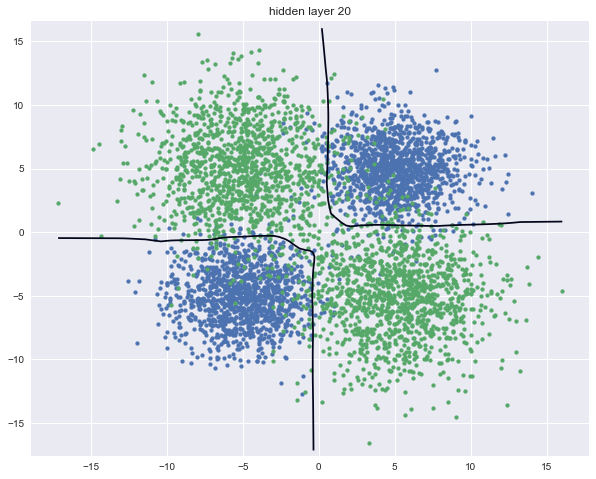

In [7]:
model2 = create_model(2, 10, 20)
model2.fit(X, y, epochs=20)

axis = np.linspace(X[:, 0].min(), X[:, 0].max(), (X[:, 0].max() - X[:, 0].min()) * 3)
x1_mesh, x2_mesh = np.meshgrid(axis, axis)
plt.figure(figsize=(10, 8))
plt.scatter(class1[:, 0], class1[:, 1], s=15)
plt.scatter(class2[:, 0], class2[:, 1], s=15)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.title('hidden layer 20')
predict = model2.predict(np.vstack((x1_mesh.flatten(), x2_mesh.flatten())).T)
predict = predict.reshape(x1_mesh.shape)
contour = plt.contour(x1_mesh, x2_mesh, predict, levels=[0.5])